In [1]:
import numpy as np
import warnings
import math
import matplotlib
import matplotlib.pylab as plt
import scipy.special

In [2]:
% matplotlib inline

## 1. Algo + Data Structures

###  Q 1.1: Fibionacci

#### Q 1.1.1

In [3]:
def fibonacci(n):
    """Returns the 'n'th fibonacci number.
    This is a recursive function.
    """
    
    if n < 1 or n != int(n): # this line can be removed for speed if we are sure of the input
        warnings.warn('\"n\" must be a positive integer.' ,DeprecationWarning)
        return
    
    if n == 1:
        return 1
    
    if n == 2:
        return 1
    
    return fibonacci(n - 1) + fibonacci(n - 2)

Note: I have not included the tests that I did so I make sure the function works in all circumstances. But those are important part of the process.

#### Q 1.1.2

Since at each step we run an additional 2 fibonacci functions, the complexity is $O(2^n)$.

#### Q 1.1.3

(this is a shared answer for Q 1.1.3 and Q 1.1.5)

To decrease the complexity and memory use, as well as performance, I made the function a bit more complicated.

A simple way to decrease the complexity would be to save the the previous values of the sequence in a list and append the end by adding the last two (or memoization). But this uses a lot of memory if we only are interested in the last value but not the whole sequence. Reading a list does not add to the complexity (it's $O(n)$) but it deceases the performance.

Next approach would be to only save the last two values, $last_val$ and $one_to_last_val$. The code this way would be easier to interpret, as long as we swap these values each time. This deceases the performance (it's complexity of $O(1)$ does not effect our complexity). This is a very small so in a real world Fibonacci code, this should be fine for next to all problems.

But we can go further. We can avoid the swapping and just remembering which varibale is the last one.

And even a bit more further (my answer), and avoid that remembering part. From $2$ to $n$ (or $n-1$ if $n$ is odd) we perform counting up the sequence. Ergo the loop of $floor((n-2)/2)$ (divided by 2 so we don't have to remember which variable is which). At the end if $n$ was even we return $temp_variable_2$ and if it was odd, we just have to do the add up one more time and return the value.

In [4]:
def fibonacci2(n):
    """Returns the 'n'th fibonacci number.
    This is not a recursive function.
    """
    
    if n < 1 or n != int(n): # this line can be removed for speed if we are sure of the input
        warnings.warn('\"n\" must be a positive integer.' ,DeprecationWarning)
        return
    
    if n == 1:
        return 1
    
    if n == 2:
        return 1
    
    temp_variable_1 = 1
    temp_variable_2 = 1
    
    for _ in range(math.floor((n - 2)/2)):
        temp_variable_1 = temp_variable_1 + temp_variable_2
        temp_variable_2 = temp_variable_1 + temp_variable_2
    
    if n % 2:
        return temp_variable_1 + temp_variable_2
    else:
        return temp_variable_2

In [5]:
# Test of fibonacci2 function

for i in range(20):
    print(fibonacci2(i+1))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


#### Q 1.1.4

Complexity in this example is $O(n)$.

#### Q 1.1.5

Please read the description answer to Q 1.1.5 as I have tried to implement most of optimizations I could think of and implement them in my answer

However, the answer is for when we only want the $n$'th value. If we want to have the whole sequence (like the loop test 2 lines above), we should save the function some how that it would save the sequence and return the whole sequence as it would improve the complexity from $O(n^2)$ to $O(n)$. So this is very problem dependent.

### Q 1.2: Linked List

#### Q 1.2.1

In [6]:
class Node:
    
    # Initializing the Node
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkeList:
    
    # Initializing the class
    def __init__(self):
        self.head = None
        
    def push(self, data):
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node
        
    def pop(self):
        data = self.head.data
        self.head = self.head.next
        return data
    
    def pop_last(self):
        current = self.head
        while current.next is not None:
            previous = current
            current = current.next
        data = current.data
        previous.next = None
        return data

    def printList(self): 
        temp = self.head 
        while temp: 
            print(temp.data) 
            temp = temp.next
            
    def reverse_linked_list(self):
        """ Reveses the linked list"""

        current = self.head
        previous = None
        while current is not None:
            next_ = current.next
            current.next = previous
            previous = current
            current = next_
        self.head = previous
    
    def size(self):
        length = 0
        current = self.head
        while current:
            length += 1
            current = current.next
        return length
        
    # cut list in half
    def cut_list_in_half(self):
        """ Cutting a linked list in half.
        If the lenght of the list is odd then we throw out the middle element.
        """
        
        length = self.size()
        
        if length == 0:
            print('Zero size list cannot be cut in half')
            return
        
        current = self.head
        second_half_list = LinkeList()
        for i in range(math.floor((length - 2) / 2)):
            current = current.next
        if length % 2:
            second_half_list.head = current.next.next
            current.next = None
        else:
            second_half_list.head = current.next
            current.next = None

        return self, second_half_list

In [7]:
def is_palindrome(L):
    """ Returns whether or not the linked list is a palindrome.
    pops data from head and tail of the list and compares them.
    """
    size = L.size()
    if size == 0:
        return True
    
    for _ in range(size):
        try:
            if L.pop() != L.pop_last():
                return False
        except:
            # no more data to pop
            return True
    

It is possible to modify this to not to destroy the list by popping $i$'th and $(N-i)$'th element. This will not add to the complexity but it would decrease the performance.

#### Q 1.2.2

get size $O(n)$, pop from last is $O(n)$ and it has done $n/2$ times. So the complexity if $O(n^2)$.

#### Q 1.2.3

I used and modified the functions in the LinkedLink class defined in Q 1.2.1.

This functions destroy the linked list, but it is delibrate to not to write anything extra on memory (it has a $O(1)$ memory complexity). Alternatively we can write a copy function to copy the original list.

In [8]:
def is_palindrome2(L):
    """ Cut list in half and compare them.
    If first half is equal to the reverse of the second half
    then it is palindrom and function returns True
    """
    
    try:
        first_half_list, second_half_list = L.cut_list_in_half()
    except:
        # if size is zero it is a palindrome
        return True
    
    second_half_list.reverse_linked_list()

    first_list_size = first_half_list.size()
    second_list_size = second_half_list.size()
    if first_list_size != second_list_size:
        return False
    
    for _ in range(first_list_size):
        if first_half_list.pop() != second_half_list.pop():
            return False
    return True

#### Q 1.2.4

get size $O(n)$, then cut in half $O(n)$, reverse $O(n)$ and then compare $O(n)$. So the complexity if $O(n)$.

#### Q 1.2.5

Converting the singly-linked-list to a doubly-linked-list would be one way to improve the performance. However, this would increase the memory complexity from $O(1)$ to $O(n)$, and does not change the complexity. But since we do not need to run cutting and reversing the list, preformance increases. This would also preserve the linked-list, so if that is the our intent, memory complexity can be justified.

## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?

In [9]:
def compute_pi(n):
    """Returns pi and its error.
    'n' is the number of trials.
    """
    
    counter = 0

    for _ in range(n):
        # math.hypot returns the Euclidean norm, sqrt(x*x + y*y)
        if math.hypot(np.random.rand(), np.random.rand()) < 1:
            counter += 1

    pi_ = 4. * counter / n
    error = math.sqrt(((4 / pi_) - 1) / n)
    
    return {'pi':pi_, 'error': error}

In [13]:
compute_pi(1000000)

{'error': 0.0005226350651965728, 'pi': 3.14182}

### Q 2.2: Making a 6-side die roll a 7?

Easiest way would be getting a mod of sum of 7 dice.

In [14]:
def dice_roll_seven():
    """Returns a random number between 1 and 7 (inclusive)
    by rolling six sided dice.
    """
    
    return (sum(np.random.randint(6, size=7)) % 7) + 1

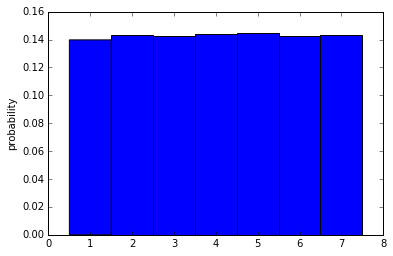

In [15]:
# Just a simple plot to show the result

n = 70000

dice_array = np.empty(n)

for i in range(n):
    dice_array[i] = dice_roll_seven()

plt.hist(dice_array, bins=range(1,9),
         align='left',
         normed=True)

plt.ylabel('probability')

### Q 2.3: Is normality uniform?

We can use probability integral transform, regardless of the input distribution. We make a ECDF of the distribution and inverse it.

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [17]:
mu = 41
sigma = 27
data = np.random.normal(mu, sigma, size=100000) # with arbitary mean and sd

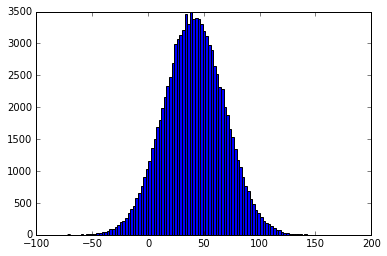

In [18]:
_ = plt.hist(data,bins=100)

In [19]:
x, y = ecdf(data)

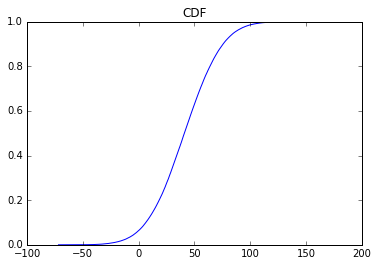

In [20]:
plt.plot(x, y)
plt.title('CDF')

And obviously:

(0, 1100)

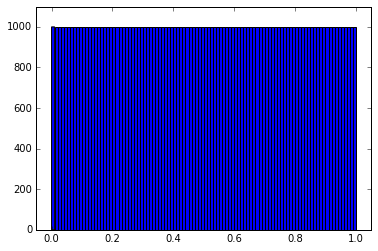

In [21]:
plt.hist(y,bins=100)
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1100)

Distribution of $y$ is uniform. So All we need to do is to get the CDF function of our initial distribution.

$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

$CDF(x) = \int_{-inf}^x f(x) = \frac {1}{2} [1+ erf({\frac {x-\mu }{\sigma {\sqrt {2}}}})]$

In [22]:
def normal_cdf_return(x, mu, sigma):
    """Returns the CDF of normal distribution"""
    
    return (1 + scipy.special.erf((x - mu) / (np.sqrt(2) * sigma) )) / 2.

In [23]:
data_uni = np.zeros_like(data)

for i, val in enumerate(data):
    data_uni[i] = normal_cdf_return(val, mu, sigma)

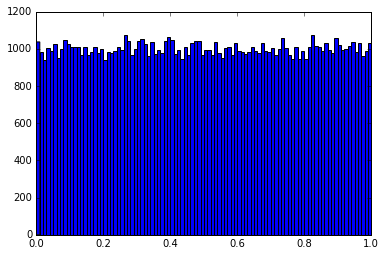

In [24]:
_ = plt.hist(data_uni, bins=100)

### Q 2.4: Should you pay or should you go?

Probability of getting head in the first toss is $1/2$ and I should pay \$$1$

sencond time: $1/4$ ($1/2$(all tails before) x $1/2$ (heads now)) and I pay \$$2$

...

$n$'th time: $1/2^n$ and I pay $2^{(n-1)}$

So expectation value of this is 

$\lim_{N \rightarrow inf} \frac{1}{N}\sum_{i=1}^N 1/2^n \times 2^{(n-1)} = \lim_{N \rightarrow inf} \frac{1}{N}\sum_{i=1}^N \frac{1}{2} = \frac{1}{2}$

So I would pay less than 50 cents.

### Q 2.5: Uber vs. Lyft

The probablity of each arriving before the another is constant so this is just a permutation problem.

$P($all Lyfts first$)$ = $\frac{permutation\ of\ all\ first\ Lyfts\ \times \ permutation\ of\ all\ last\ Ubers}{all\ permutations} = \frac{3! x 2!}{6!} \approx 0.0167$

Since the equation above has no direction (i.e. P(all Uber first) = P(all Uber last)), then the probability is the same as $0.0167$.